<a href="https://colab.research.google.com/github/shmilyface/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [2]:
#import
import pandas as pd

#breast cancer surgery data: Source UCI Repos.
bc_url = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')

#missing one value in relation to website data
bc_url.info()

bc_url.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
30     305 non-null int64
64     305 non-null int64
1      305 non-null int64
1.1    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
#missing headers
columns = ['age', 'op_date', 'pand', 'survival']

bc_data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=columns)
bc_data.head()

,age,op_date,pand,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#missing values check
bc_data.isna()

,age,op_date,pand,survival
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [5]:
#survival column: binary conversion
bc_data.survival.replace(2, 0, inplace=True)
bc_data.survival.head(100)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    0
25    1
26    1
27    1
28    1
29    1
     ..
70    1
71    1
72    1
73    0
74    0
75    0
76    1
77    1
78    1
79    1
80    0
81    0
82    0
83    1
84    1
85    1
86    1
87    1
88    1
89    0
90    0
91    0
92    0
93    1
94    1
95    1
96    0
97    0
98    0
99    1
Name: survival, Length: 100, dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [6]:
#Crosstab: Survival, Age
pd.crosstab(bc_data.age, bc_data.survival, margins=True)

survival,0,1,All
age,,,
30,0,3,3
31,0,2,2
33,0,2,2
34,2,5,7
35,0,2,2
36,0,2,2
37,0,6,6
38,1,9,10
39,1,5,6


In [7]:
#Crosstab: Summary/Percentage of Survivals by Age
pd.crosstab(bc_data.age, bc_data.survival, normalize='index')

survival,0,1
age,,
30,0.000000,1.000000
31,0.000000,1.000000
33,0.000000,1.000000
34,0.285714,0.714286
35,0.000000,1.000000
36,0.000000,1.000000
37,0.000000,1.000000
38,0.100000,0.900000
39,0.166667,0.833333


In [0]:
#Crosstab: Summary of Age vs Pand
  

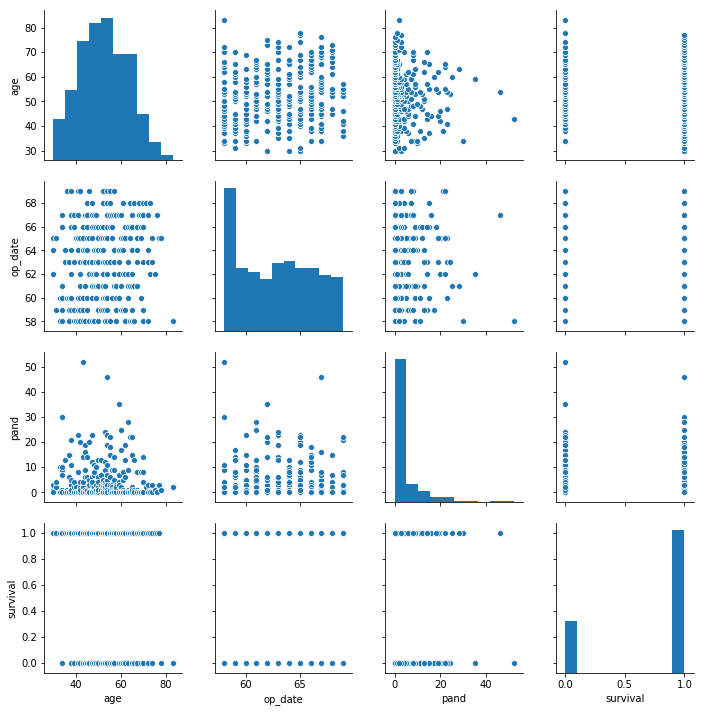

In [8]:
#Pairplot
import seaborn as sns

sns.pairplot(bc_data)

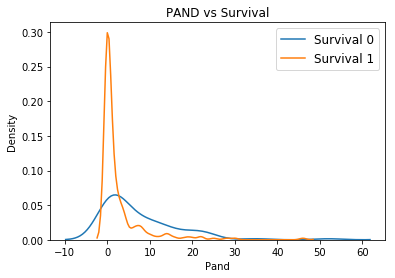

In [30]:
import matplotlib.pyplot as plt

#created function to plot survival in two lines
def curly_chart(df, v, f, lbl):
  x = df[df.survival == v]
  sns.distplot(x[f], hist=False, kde=True, label=lbl)

#function to plot features  
def double_up(df, f):
  curly_chart(df, 0, f, 'Survival 0')
  curly_chart(df, 1, f, 'Survival 1')


double_up(bc_data, 'pand')

#spruce it up
plt.legend(prop={'size': 12})
plt.title('PAND vs Survival')
plt.xlabel('Pand')
plt.ylabel('Density'); 

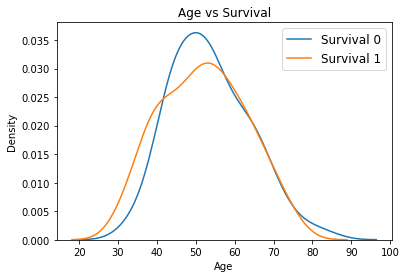

In [31]:
#Survival Age Relationship
double_up(bc_data, 'age')

#spruce it up
plt.legend(prop={'size': 12})
plt.title('Age vs Survival')
plt.xlabel('Age')
plt.ylabel('Density');

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

It's difficult to say with any clarity whether the surgery itself is what increased the likelihood of survival for the cancer patients. We don't have any data to compare with patients who didn't get the surgery. However, of the patients that did get the surgery, the vast majority (225 of 306 entries) survived. More data would be needed to prove this hypothesis. 

Survival appears to be directly affected by both the age of the patient, as well as the number of PAND's they have at the time of the surgery. (see above modules [30] and [31] ). Patients between the ages of 40-60 had the best odds of survival, and patients that had zero to 10 PANDS detected are most likely to survive for more than 5 years. 

These results certainly need more information, for instance, gender, stage of cancer, if certain medications used during the surgery differed from patient to patient, possibly lowering the effectiveness of either detection of PANDs or changed the odds of recovering. Based only on the information in the graph, it appears the surgery was of great benefit to patients, giving them a higher likelihood of surviving breast cancer, and appears more successful depending on age, and a lower number of PAND's. 